<h1 style="color:rgb(0,120,170)">Hands-on AI II</h1>
<h2 style="color:rgb(0,120,170)">Unit 1 &mdash; Recap Hands-on AI I (Assignment)</h2>

<b>Authors:</b> S. Lehner, J. Brandstetter, B. Schäfl<br>
<b>Date:</b> 26-03-2021

This file is part of the "Hands-on AI II" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This  material,  no  matter  whether  in  printed  or  electronic  form,  may  be  used  for personal  and non-commercial educational use only.  Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2>Table of contents</h2>
<ol>
    <a href="#exercise-tabular-data"><li style="font-size:large;font-weight:bold">Tabular data</li></a>
    <ol style="margin-bottom:15px">
        <a href="#exercise-tabular-data-one"><li style="font-size:medium">Loading and visualizing</li></a>
        <a href="#exercise-tabular-data-two"><li style="font-size:medium">Inspecting the pairplot</li></a>
        <a href="#exercise-tabular-data-three"><li style="font-size:medium">Downprojecting and clustering</li></a>
    </ol>
    <a href="#exercise-sequence-data"><li style="font-size:large;font-weight:bold">Sequence data</li></a>
    <ol style="margin-bottom:15px">
        <a href="#exercise-sequence-data-one"><li style="font-size:medium">Loading and visualizing</li></a>
        <a href="#exercise-sequence-data-two"><li style="font-size:medium">Inspecting the lineplots</li></a>
        <a href="#exercise-sequence-data-three"><li style="font-size:medium">Constructing new features</li></a>
    </ol>
    <a href="#exercise-image-data"><li style="font-size:large;font-weight:bold">Image data</li></a>
    <ol style="margin-bottom:15px">
        <a href="#exercise-image-data-one"><li style="font-size:medium">Loading and custom filters</li></a>
        <a href="#exercise-image-data-two"><li style="font-size:medium">Constructing a CNN network</li></a>
        <a href="#exercise-image-data-three"><li style="font-size:medium">Training a CNN network</li></a>
    </ol>
</ol>

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>
This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which require your contribution (in form of code, plain text, ...). Most/All of the supplied functions are imported from the file <code>u1_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u1_utils.py</code> need to be installed.

In [1]:
# Import pre-defined utilities specific to this notebook.
import u1_utils as u1

# Import additional utilities needed in this notebook.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch

from pathlib import Path
from PIL import Image
from scipy import signal
from sklearn.neighbors import KNeighborsClassifier

# Setup Jupyter notebook (warning: this may affect all Jupyter notebooks running on the same Jupyter server).
u1.setup_jupyter()

<h3 style="color:rgb(0,120,170)">Module versions</h3>
As mentioned in the introductiory slides, specific minimum versions of Python itself as well as of used modules is recommended.

In [2]:
u1.check_module_versions()

Installed Python version: 3.8 (✓)
Installed numpy version: 1.18.5 (✓)
Installed pandas version: 1.0.5 (✓)
Installed PyTorch version: 1.7.1+cpu (✓)
Installed scikit-learn version: 0.23.1 (✓)
Installed scipy version: 1.5.0 (✓)
Installed matplotlib version: 3.2.2 (✓)
Installed seaborn version: 0.10.1 (✓)
Installed PIL version: 7.2.0 (✓)


<a name="exercise-tabular-data"></a><h2>Tabular data</h2>

<p>In this exercise you'll be working with another famous data set, the <i>iris</i> data set. It is composed of various measurements of physical attributes of iris flowers. The data set distinguishes <i>three</i> different classes, one for each type of iris flower. It was published by:

<center><cite>Fisher,R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936)</cite></center>

Currently, it is maintained by the <a href="https://archive.ics.uci.edu/ml">UCI Machine Learning Repository</a>:

<center><cite>Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science.</cite></center></p>

<a name="exercise-tabular-data-one"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Load the <i>iris</i> data set using the appropriate function as supplied by us.</li>
        <li>Visualize the iris data set in tabular form. What is the size of the data set with respect to sample and feature counts?</li>
    </ul>
</div>

In [3]:
data_iris = u1.load_iris()
data_iris
#150 samples and 4 features, we refer to type as to 'label'

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<a name="exercise-tabular-data-two"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Compute a pairplot of the iris data set with respect to <i>all</i> features.</li>
        <li>Which type(es) of iris flower may be linearly separable by which feature(s), if any?</li>
    </ul>
</div>

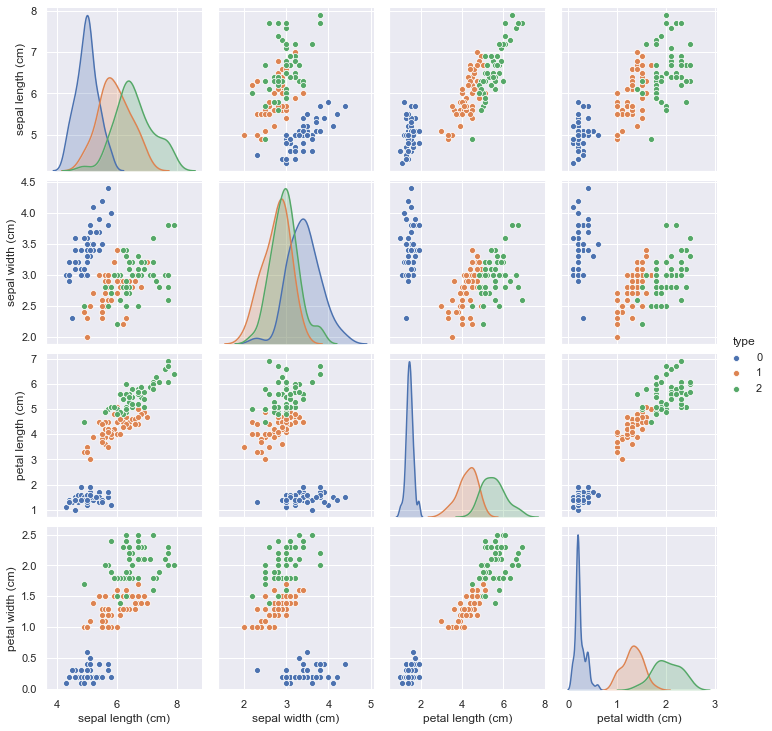

In [4]:
sns.set()
# Define features of which to compute correlations and plot a corresponding pairplot.
num_type = data_iris[r'type'].unique().size
features = [r'sepal length (cm)', r'sepal width (cm)', r'petal length (cm)', r'petal width (cm)']
_ = sns.pairplot(data_iris, vars=features, hue=r'type', diag_kind=r'kde', palette=sns.color_palette()[:num_type])
#type 0 in petal lenght and width, also in some other cases - it seems that it is the most "different"

<a name="exercise-tabular-data-three"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Reduce the dimensionality of the iris data set using <i>PCA</i> as well as <i>t-SNE</i> and visualize the downprojections.</li>
        <li>Apply $k$-means as well as <i>affinity propagation</i> on the downprojected data sets. Which combination works best. Interpret your results.</li>
    </ul>
</div>

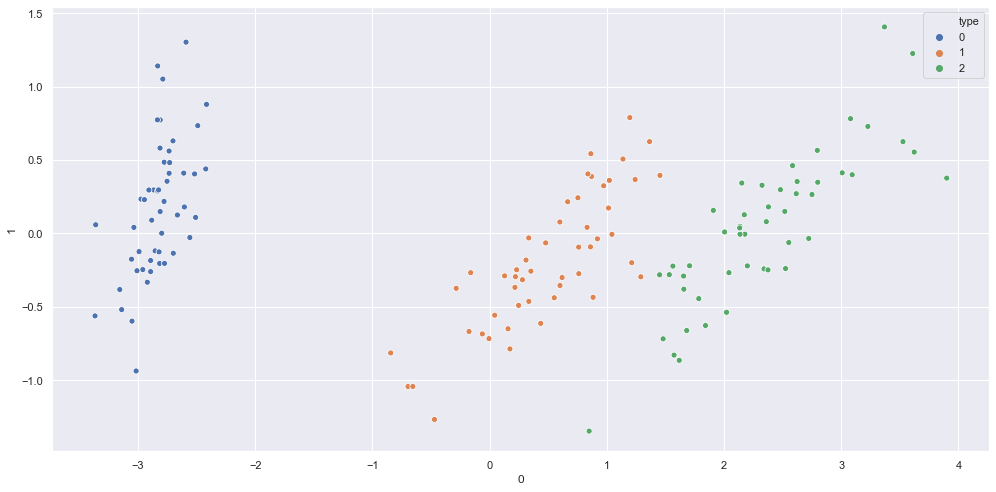

In [5]:
# Set default plotting style and random seed for reproducibility.
sns.set()
np.random.seed(seed=42)

# Compute Principal Component Analysis (PCA) and reduce the dimensionality of the wine data set.
data_iris_pca = u1.apply_pca(n_components=2, data=data_iris, target_column=r'type')
u1.plot_points_2d(data=data_iris_pca, target_column=r'type', figsize=(14, 7))

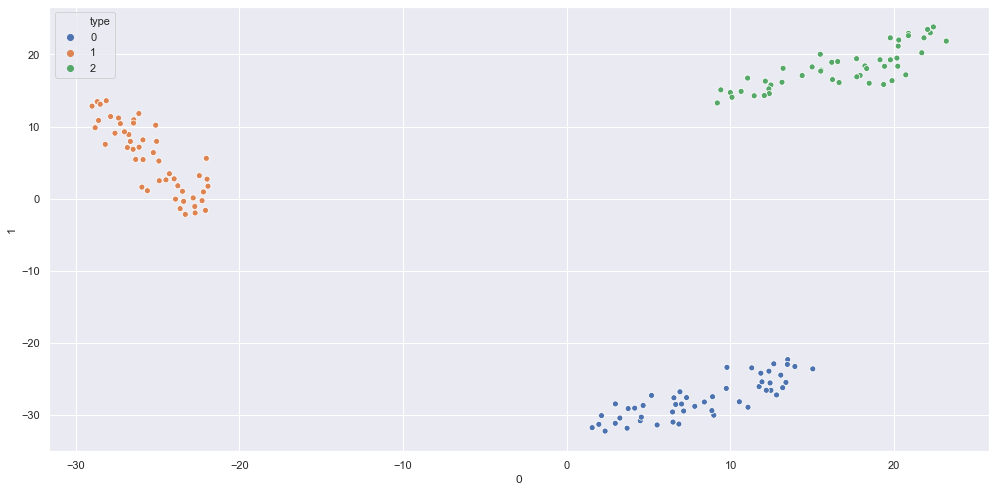

In [6]:
# Set default plotting style and random seed for reproducibility.
sns.set()
np.random.seed(seed=42)

# Compute t-SNE and reduce the dimensionality of the wine data set.
data_iris_tsne = u1.apply_tsne(n_components=2, data=data_iris, perplexity=15.0, target_column=r'type')
u1.plot_points_2d(data=data_iris_tsne, target_column=r'type', figsize=(14, 7))

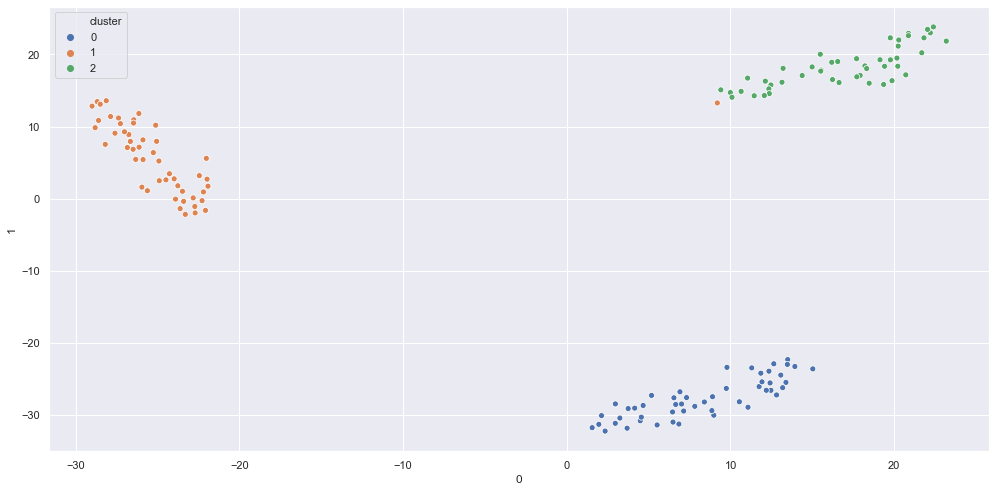

In [7]:
# Set default plotting style and random seed for reproducibility. 
sns.set()
np.random.seed(seed=42)

# Compute k-means on the t-SNE downprojected data set.
data_iris_k_means = data_iris_tsne.copy()
data_iris_k_means = data_iris_k_means.rename(columns={r'type': r'cluster'})
data_iris_k_means[r'cluster'] = u1.apply_k_means(k=3, data=data_iris)
u1.plot_points_2d(data=data_iris_k_means, target_column=r'cluster', figsize=(14, 7))

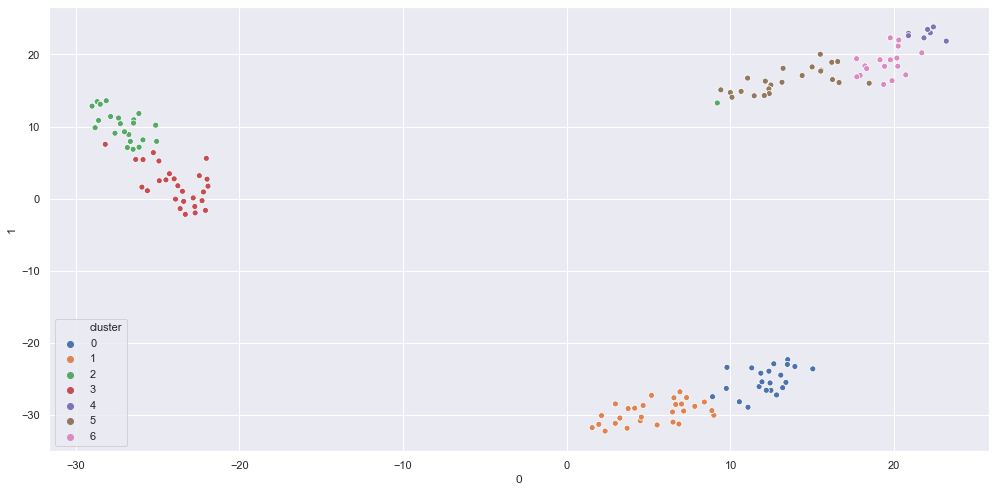

In [8]:
# Set default plotting style and random seed for reproducibility. 
sns.set()
np.random.seed(seed=42)

# Compute affinity propagation on the t-SNE downprojected data set.
data_iris_affinity_propagation = data_iris_tsne.copy()
data_iris_affinity_propagation = data_iris_affinity_propagation.rename(columns={r'type': r'cluster'})
data_iris_affinity_propagation[r'cluster'] = u1.apply_affinity_propagation(data=data_iris)
u1.plot_points_2d(data=data_iris_affinity_propagation, target_column=r'cluster', figsize=(14, 7))

In [9]:
#k-means does not change anything as data are far from each other, so it is not needed in this case
#affinity propagation - we get 7 clusters alltogether, but it seams that a point from green cluster is also on the top right and
#also some points cannot still be lineary separated, as we know we have 3 types of flowers I am not sure if this makes sense to do

<a name="exercise-sequence-data"></a><h2>Sequence data</h2>
<p>In this exercise you'll be working with <i>electricity demand</i> data as collected from the <i>Australian New South Wales Electricity Market</i>. It was first published/described by:</p>

<p><center><cite>M. Harries. Splice-2 comparative evaluation: Electricity pricing. Technical report, The University of South Wales, 1999. </cite></center></p>

Currently, it is maintained by the <a href="https://www.openml.org/home">OpenML</a> project:

<center><cite>Joaquin Vanschoren, Jan N. van Rijn, Bernd Bischl, and Luis Torgo. OpenML: networked science in machine learning. SIGKDD Explorations 15(2), pp 49-60, 2013.</cite></center></p>
<center><cite>Matthias Feurer, Jan N. van Rijn, Arlind Kadra, Pieter Gijsbers, Neeratyoy Mallik, Sahithya Ravi, Andreas Mueller, Joaquin Vanschoren, Frank Hutter. OpenML-Python: an extensible Python API for OpenML. arXiv:1911.02490 [cs.LG], 2019</cite></center></p>

<a name="exercise-sequence-data-one"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Load the <i>electricty</i> data set using the appropriate function as supplied by us.</li>
        <li>Visualize the electricity data set in tabular form. What is the size of the data set with respect to sample and feature counts?</li>
    </ul>
</div>

In [10]:
data_electricity = u1.load_electricity()
data_electricity
#45312 samples, demand is a label, 8 features

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,demand
0,0.0000,2.0,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,0
1,0.0000,2.0,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,0
2,0.0000,2.0,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,0
3,0.0000,2.0,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,0
4,0.0000,2.0,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,1
...,...,...,...,...,...,...,...,...,...
45307,0.9158,7.0,0.914894,0.044224,0.340672,0.003033,0.255049,0.405263,1
45308,0.9158,7.0,0.936170,0.044884,0.355549,0.003072,0.241326,0.420614,1
45309,0.9158,7.0,0.957447,0.043593,0.340970,0.002983,0.247799,0.362281,1
45310,0.9158,7.0,0.978723,0.066651,0.329366,0.004630,0.345417,0.206579,0


<a name="exercise-sequence-data-two"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Visualize the electricity data set using <i>lineplots</i> with <i>period</i> as the <i>x-axis</i>, once <i>nswdemand</i> and once <i>nswprice</i> as the <i>y-axis</i>. Colorized by the feature <i>day</i>.</li>
        <li>Do you observe any correlations between both plots?</li>
    </ul>
</div>

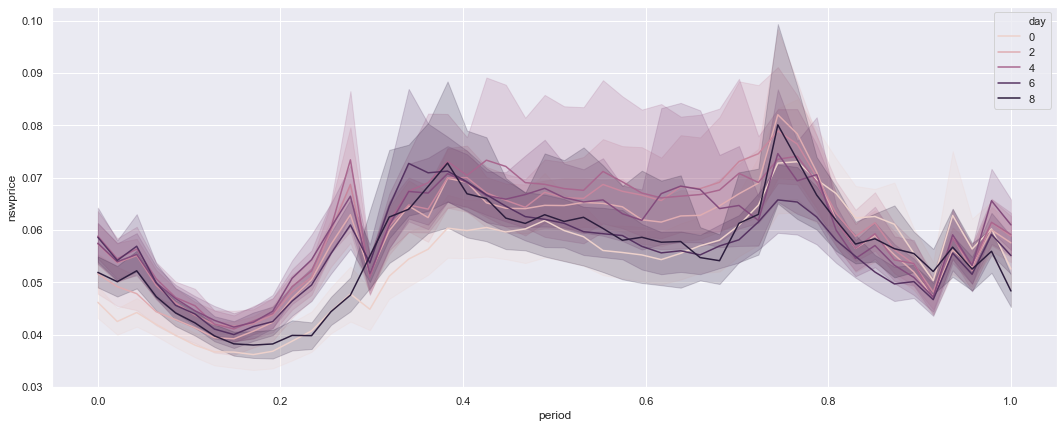

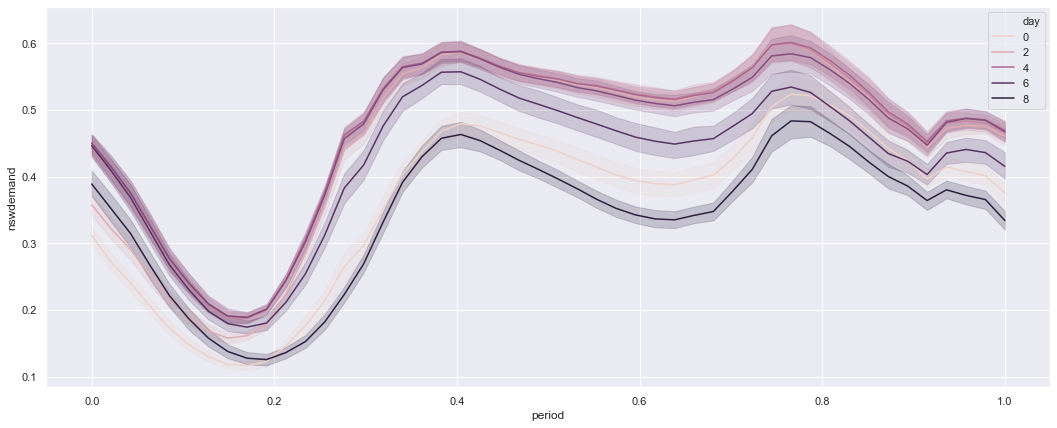

In [11]:
# Set default plotting style.
sns.set()


# Plot nswprice.
fig= plt.subplots(1, 1, figsize=(18, 7))
_ = sns.lineplot(x=r'period', y=r'nswprice', hue=r'day', sort=False, data=data_electricity)

# Plot nswdemand.
fig= plt.subplots(1, 1, figsize=(18, 7))
_ = sns.lineplot(x=r'period', y=r'nswdemand', hue=r'day', sort=False, data=data_electricity)

<a name="exercise-sequence-data-three"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Compute the total electricity demand <i>per day</i> for <i>NSW</i> as well as <i>VIC</i>. Hint: have a look at the <a href="https://pandas.pydata.org/docs/user_guide/groupby.html#splitting-an-object-into-groups">pandas documentation</a>.</li>
        <li>Visualize the total electricity demand <i>per day</i> and <i>state</i> (<i>NSW</i> and <i>VIC</i>). Do you expect what you observe?</li>
    </ul>
</div>

In [12]:
grouped = data_electricity.groupby('day').sum()
grouped

,date,period,nswprice,nswdemand,vicprice,vicdemand,transfer,demand
day,,,,,,,,
1.0,3208.717529,3216.0,345.967682,2323.531982,18.098211,2119.268311,3758.243896,3345
2.0,3210.580078,3240.0,376.691742,2925.598389,22.741953,2828.269287,3148.001221,3515
3.0,3224.259277,3240.0,391.270935,3028.040527,27.294243,2961.588379,3065.035156,3802
4.0,3226.126221,3240.0,394.843201,3037.631348,23.946808,2998.382568,3033.787354,3819
5.0,3246.385254,3240.0,385.681030,3005.705078,22.721003,2993.316406,3007.031982,3874
6.0,3248.254150,3240.0,365.891968,2741.765625,21.923594,2892.014648,3082.484619,3923
7.0,3249.970215,3240.0,361.782288,2214.262695,20.372431,2370.288574,3585.267578,3797


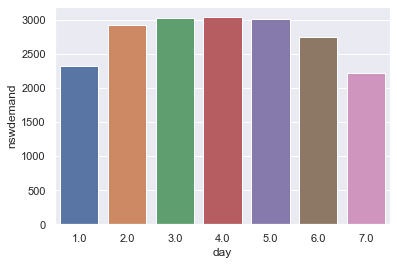

In [13]:
new = grouped.copy().reset_index()
sns.barplot(x='day', y="nswdemand", data=new)

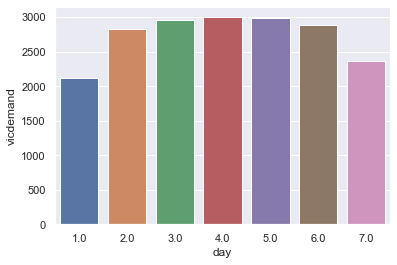

In [14]:
sns.barplot(x='day', y="vicdemand", data=new)

<a name="image-data"></a><h2>Image data</h2>

<p>In this exercice you'll be working with a data set composed of various <i>images</i> of fashion items (e.g. shoes or shirts). The data set distinguishes <i>ten</i> different classes, one for each type of fashion item. For curious minds, more information regarding this data set can be found at:

<center><cite>Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. arXiv:1708.07747</cite></center>

You should already be familiar with this data set, hence the initial tabular visualization may be skipped.

<a name="exercise-image-data-one"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Load and optionally visualize the <i>Fashion-MNIST</i> data set using the appropriate function as supplied by us.</li>
        <li>Define the following filters and apply them on one of the <tt>fashion_mnist_sprite_[0-9].png</tt> images (with $*$ as the convolution and $\sigma{}$ as the sigmoid operation):</li>
    </ul>
    <p>
        \begin{equation}G_x = \left(
            \begin{array}{rrrrr}
                -1 &  1 &  0 & 1 & 1 \\
                -2 &  2 &  0 & 2 & 2 \\
                -3 &  3 &  0 & 3 & 3 \\
                -2 &  2 &  0 & 2 & 2 \\
                -1 &  1 &  0 & 1 & 1
            \end{array}\right) * \sigma{(A)}
        \end{equation}
    </p>
    <p>
        \begin{equation}G_y = \left(
            \begin{array}{rrrrr}
                 -1 &  -2 &  -3 &  -2  &  -1  \\
                  1 &   2 &   3 &   2  &   1  \\
                  0 &   0 &   0 &   0  &   0  \\
                  1 &   2 &   3 &   2  &   1  \\
                 -1 &  -2 &  -3 &  -2  &  -1
            \end{array}\right) * \sigma{(A)}
        \end{equation}
    </p>
    <ul>
        <li>Visualize the original as well as the resulting images.</li>
    </ul>
</div>

In [15]:
data_fashion_mnist=u1.load_fashion_mnist()

In [16]:
data_fashion_mnist

,PX_0,PX_1,PX_2,PX_3,PX_4,PX_5,PX_6,PX_7,PX_8,PX_9,...,PX_775,PX_776,PX_777,PX_778,PX_779,PX_780,PX_781,PX_782,PX_783,item_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


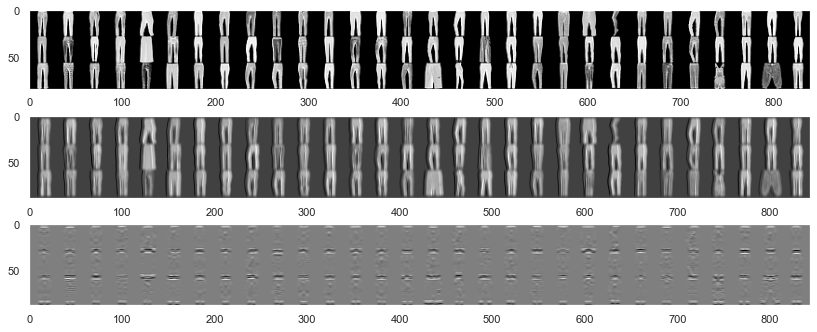

In [17]:
# Set default plotting style.
sns.set()

# Define G operators.
g_x = np.asarray([[-1, 1, 0, 1, 1],[-2, 2, 0, 2, 2],[-3, 3, 0, 3, 3],[-2, 2, 0, 2, 2],[-1, 1, 0, 1, 1]])
g_y = np.asarray([[-1, -2, -3, -2, -1],[1, 2, 3, 2, 1], [0, 0, 0, 0, 0],[1, 2, 3, 2, 1],[-1, -2, -3, -2, -1] ])

# Load Fashion-MNIST images of specified class.
class_index = 1
image_path = f'resources/fashion_mnist_sprite_{class_index}.png'
with Image.open(image_path) as image_data:
    image_fashion_mnist = image_data.convert(r'L')

# Define plotting figure and corresponding attributes.
fig, ax = plt.subplots(3, 1, figsize=(14, 7))
fig.subplots_adjust(hspace=-0.35)
for axis in ax:
    axis.grid(False)

# Compute and plot both manually defined filters as well as original image.
_ = ax[0].imshow(image_fashion_mnist, cmap=r'gray')
_ = ax[1].imshow(signal.convolve2d(np.array(image_fashion_mnist), g_x), cmap=r'gray')
_ = ax[2].imshow(signal.convolve2d(np.array(image_fashion_mnist), g_y), cmap=r'gray')

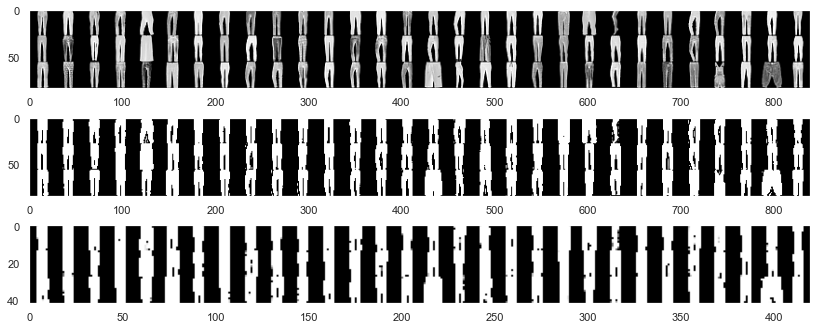

In [18]:
# Set default plotting style.
sns.set()

# Define plotting figure and corresponding attributes.
fig, ax = plt.subplots(3, 1, figsize=(14, 7))
fig.subplots_adjust(hspace=-0.35)
for axis in ax:
    axis.grid(False)
    
# Compute Sigmoid
sigmoid = torch.nn.Sigmoid()
object =torch.as_tensor(np.array(image_fashion_mnist), dtype=torch.float)
image_fashion_mnist_sigmoid=sigmoid(object)

# Compute max. pooling on top of the Sigmoid activated image.
image_fashion_mnist_mp = torch.nn.functional.max_pool2d(
    image_fashion_mnist_sigmoid.unsqueeze(dim=0),
    kernel_size=(2, 2)
).squeeze(dim=0)



# Plot resulting images.
_ = ax[0].imshow(image_fashion_mnist, cmap=r'gray')
_ = ax[1].imshow(image_fashion_mnist_sigmoid, cmap=r'gray')
_ = ax[2].imshow(image_fashion_mnist_mp, cmap=r'gray')

<a name="exercise-image-data-two"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Implement a function for computing the output size of a convolution operation. Hint: have a look at the <a href="https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html">PyTorch documentation.</a></li>
        <li>Implement a class <tt>CNN</tt> with the following architecture:</li>
    </ul>
    <table style="text-align:center;vertical-align:middle">
        <th>Position</th>
        <th>Element</th>
        <th>Comment</th>
        <tr>
            <td>0</td>
            <td>input</td>
            <td>-</td>
        </tr>
        <tr>
            <td>1</td>
            <td>2D convolution</td>
            <td>$16$ output channels and a kernel size of $7\times{}7$</td>
        </tr>
        <tr>
            <td>2</td>
            <td>ReLU</td>
            <td>-</td>
        </tr>
        <tr>
            <td>3</td>
            <td>max. pooling</td>
            <td>kernel size of $3\times{}3$</td>
        </tr>
        <tr>
            <td>4</td>
            <td>2D convolution</td>
            <td>$8$ output channels and a kernel size of $3\times{}3$</td>
        </tr>
        <tr>
            <td>5</td>
            <td>ReLU</td>
            <td>-</td>
        </tr>
        <tr>
            <td>6</td>
            <td>max. pooling</td>
            <td>kernel size of $2\times{}2$</td>
        </tr>
        <tr>
            <td>7</td>
            <td>fully connected</td>
            <td>$64$ output features</td>
        </tr>
        <tr>
            <td>8</td>
            <td>ReLU</td>
            <td>-</td>
        </tr>
        <tr>
            <td>9</td>
            <td>fully connected</td>
            <td>$10$ output features</td>
        </tr>
        <tr>
            <td>10</td>
            <td>output</td>
            <td>-</td>
        </tr>
    </table>
    <ul>
        <li>Split the Fashion-MNIST data set in a <i>training</i> as well as <i>test</i> set in a ratio of $4 : 1$. Print the corresponding sizes.</li>
    </ul>
</div>

In [19]:
class CNN(torch.nn.Module):
    """
    CNN tailored to process Fashion-MNIST data.
    """
    
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 16, 7)
        self.conv2 = torch.nn.Conv2d(16, 8, 3)
        self.fc1 = torch.nn.Linear(8 * 2 * 2, 64)
        self.fc2 = torch.nn.Linear(64, 10)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        
        # Size changes from (1, 28, 28) to (16, 22, 22).
        x = torch.relu(self.conv1(x))
        
        # Size changes from (16, 22, 22) to (16, 7, 7).
        x = torch.max_pool2d(x, 3, 3)
        
        # Size changes from (16, 7, 7) to (8, 5, 5).
        x = torch.relu(self.conv2(x))
        
        
         # Size changes from (8, 5, 5) to (8, 2, 2).
        x = torch.max_pool2d(x, 2, 2)
        
        
        # Size changes from (8, 2, 2) to (8 * 2 * 2).
        x = x.view(-1, 8 * 2 * 2)
        
        x = torch.relu(self.fc1(x))
        
        return self.fc2(x)

In [20]:
# Set default plotting style and random seed for reproducibility.
sns.set()
np.random.seed(seed=42)

# Split the Fashion-MNIST data set into training as well as test set and print their respective size.
data_fashion_mnist_train, data_fashion_mnist_test = u1.split_data(data_fashion_mnist, test_size=1.0 / 4.0)

print(f'{"Full data set is of size:":>27} {data_fashion_mnist.shape[0]:>5}')
print(f'Training subset is of size: {data_fashion_mnist_train.shape[0]:>5}')
print(f'{"Testing subset is of size:":>27} {data_fashion_mnist_test.shape[0]:>5}')

  Full data set is of size: 70000
Training subset is of size: 52500
 Testing subset is of size: 17500


<a name="exercise-image-data-three"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Create a corresponding <tt>TensorDataset</tt> for the training as well as the test set.</li>
        <li>Wrap the previously defined <tt>TensorDataset</tt> instances in separate <tt>DataLoader</tt> instances with a batch size of $32$ (shuffle the training data set).</li>
        <li>Train a <tt>CNN</tt> network for $7$ epochs, print the training accuracy as well as the loss per epoch and report the final test set loss and accuracy.</li>
    </ul>
</div>

In [21]:
# Set random seed for reproducibility.
np.random.seed(seed=42)
torch.manual_seed(seed=42)

# Create data loader for iterating the Fashion-MNIST training data set.
loader_fashion_mnist_train = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(
    torch.from_numpy(data_fashion_mnist_train.drop(columns=[r'item_type']).values.astype(
        dtype=np.float32)).unsqueeze(1).reshape(len(data_fashion_mnist_train), 1, 28, 28),
    torch.from_numpy(data_fashion_mnist_train[r'item_type'].values.astype(dtype=np.long))
), batch_size=32, shuffle=True, drop_last=False)

# Create data loader for iterating the Fashion-MNIST test data set.
loader_fashion_mnist_test = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(
    torch.from_numpy(data_fashion_mnist_test.drop(columns=[r'item_type']).values.astype(
        dtype=np.float32)).unsqueeze(1).reshape(len(data_fashion_mnist_test), 1, 28, 28),
    torch.from_numpy(data_fashion_mnist_test[r'item_type'].values.astype(dtype=np.long))
), batch_size=128, shuffle=False, drop_last=False)

In [22]:
# Set random seed for reproducibility.
np.random.seed(seed=42)
torch.manual_seed(seed=42)

# Create CNN instance and the corresponding optimizer to use.
target_device = torch.device(r'cuda' if torch.cuda.is_available() else r'cpu')
cnn_model = CNN().to(target_device)
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=1e-3)

# Train and evaluate CNN instance on the Fashion-MNIST training set.
num_epochs = 7
for epoch in range(num_epochs):
    
    # Train CNN instance for one epoch.
    u1.train_network(
        model=cnn_model, data_loader=loader_fashion_mnist_train, device=target_device, optimizer=optimizer)
    
    # Evaluate current CNN instance.
    performance = u1.test_network(
        model=cnn_model, data_loader=loader_fashion_mnist_train, device=target_device)
    
    # Print result of current epoch to standard out.
    print(f'Epoch: {str(epoch + 1).zfill(len(str(num_epochs)))} ' +
          f'/ Loss: {performance[0]:.4f} / Accuracy: {performance[1]:.4f}')

# Evaluate final model on test data set.
performance = u1.test_network(
    model=cnn_model, data_loader=loader_fashion_mnist_test, device=target_device)
print(f'\nFinal loss: {performance[0]:.4f} / Final accuracy: {performance[1]:.4f}')

Epoch: 1 / Loss: 0.0167 / Accuracy: 0.8004
Epoch: 2 / Loss: 0.0143 / Accuracy: 0.8304
Epoch: 3 / Loss: 0.0132 / Accuracy: 0.8416
Epoch: 4 / Loss: 0.0135 / Accuracy: 0.8409
Epoch: 5 / Loss: 0.0121 / Accuracy: 0.8532
Epoch: 6 / Loss: 0.0121 / Accuracy: 0.8548
Epoch: 7 / Loss: 0.0114 / Accuracy: 0.8623

Final loss: 0.0032 / Final accuracy: 0.8534
